# About the project

I came across a kaggle challenge recently and that motivated me for this project. 
The details are available at https://www.kaggle.com/geomack/spotifyclassification.
This has two playlists, one was made up entirely of songs the author George liked and the other was made up of songs he didn't like. The goal is to build a classifier to predict whether or not he'd like a song based on its audio features. Inspired by George, I decided to try this. A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning he likes it and "0" for songs he don't like. Each row represents a song.

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

Here are the 13 track attributes: 

$Acousticness$ - 

Confidence measure from 0.0 to 1.0 on whether the track is acoustic. Higher values represent greater confidence that the track is acoustic.

$Danceability$ - 

Describes how suitable it is for dancing based on a combination of tempo, rhythm stability, beat strength, and regularity. Measured on a scale of 0.0 to 1.0.

$Duration (ms)$ - 

Track duration in milliseconds

$Energy$ - 

Represents a perceptual measure of intensity and activity. Ranges from 0.0 to 1.0. Energetic tracks feel fast, loud, and noisy, and have a higher enery value.

$Instrumentalness$ - 

Predicts whether a track contains no vocals. Measured on a scale of 0.0 to 1.0. Values above 0.5 are intended to represent instrumental tracks, with higher confidence as the value approaches 1.0.

$Key$ - 

Integer value representing which key the track is in following standard pitch class notation.

$Liveness$ - 

Detects the presence of an audience in the recording. Values above 0.8 indicate strong likelihood the track is live.

$Loudness$ - 

Overall average loudness of track measured in decibels.

$Mode$ - 

Modality of track (major or minor). Major is represented by 1 and minor is represented by 0.

$Speechiness$ - 

Detects presence of spoken words. The more speech-like a recording is, the closer to 1.0 the value will be. Values above 0.66 are tracks that are probably make up entirely of spoken words, values between 0.33 and 0.66 describe tracks containing both music and speech, and values less than 0.33 represent music or non-speech tracks.

$Tempo$ - 

Overall estimate of beats per minute.

$Time Signature$ - 

Overall time signature of track. Describes number of beats that are in each bar.

$Valence$ - 

Describes the musical positiveness conveyed by the track. Measures from 0.0 to 1.0. High valence tracks sound more positive (e.g. happy, cheerful, euphoric) while low valence tracks sound more negative (e.g. sad, depressing, angry).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# display float format - instead scientific notation
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df= pd.read_csv('spotify_song.csv')

In [3]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010,0.833,204600,0.434,0.022,2,0.165,-8.795,1,0.431,150.062,4.000,0.286,1,Mask Off,Future
1,1,0.199,0.743,326933,0.359,0.006,1,0.137,-10.401,1,0.079,160.083,4.000,0.588,1,Redbone,Childish Gambino
2,2,0.034,0.838,185707,0.412,0.000,2,0.159,-7.148,1,0.289,75.044,4.000,0.173,1,Xanny Family,Future
3,3,0.604,0.494,199413,0.338,0.510,5,0.092,-15.236,1,0.026,86.468,4.000,0.230,1,Master Of None,Beach House
4,4,0.180,0.678,392893,0.561,0.512,5,0.439,-11.648,0,0.069,174.004,4.000,0.904,1,Parallel Lines,Junior Boys


In [4]:
df.shape

(2017, 17)

In [9]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.shape

(2017, 16)

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000
mean,0.188,0.618,246306.197,0.682,0.133,5.343,0.191,-7.086,0.612,0.093,121.603,3.968,0.497,0.506
std,0.260,0.161,81981.814,0.210,0.273,3.648,0.155,3.762,0.487,0.090,26.686,0.256,0.247,0.500
min,0.000,0.122,16042.000,0.015,0.000,0.000,0.019,-33.097,0.000,0.023,47.859,1.000,0.035,0.000
25%,0.010,0.514,200015.000,0.563,0.000,2.000,0.092,-8.394,0.000,0.037,100.189,4.000,0.295,0.000
50%,0.063,0.631,229261.000,0.715,0.000,6.000,0.127,-6.248,1.000,0.055,121.427,4.000,0.492,1.000
75%,0.265,0.738,270333.000,0.846,0.054,9.000,0.247,-4.746,1.000,0.108,137.849,4.000,0.691,1.000
max,0.995,0.984,1004627.000,0.998,0.976,11.000,0.969,-0.307,1.000,0.816,219.331,5.000,0.992,1.000


In [51]:
df.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

# DISTRIBUTIONS

Now let's look at distributions of the audio features. This is an important step because some models assume input variables follow a normal distribution.

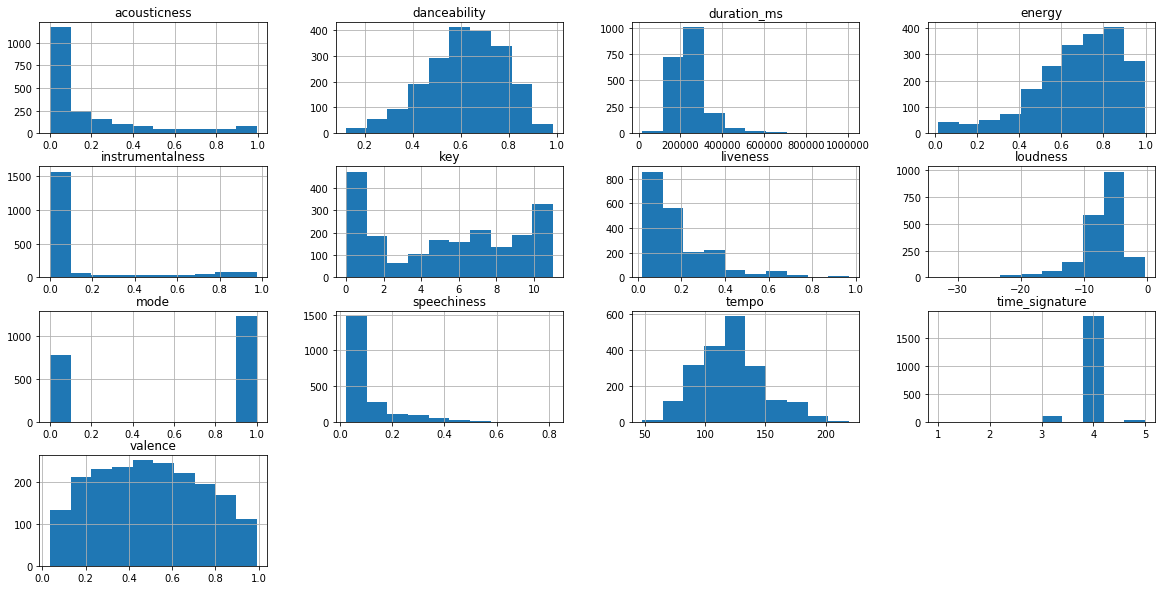

In [32]:
df2 = df.loc[:,~df.columns.isin(['song_title'  ,'artist','target' ])]
df2.hist(figsize = (20,10))
plt.show();

Now let's take a look at how the audio features vary by preference group. Boxplots will be perfect for this. Let's also use a t-test to compare means between preference groups. Remember, songs I like have a target value of 1.

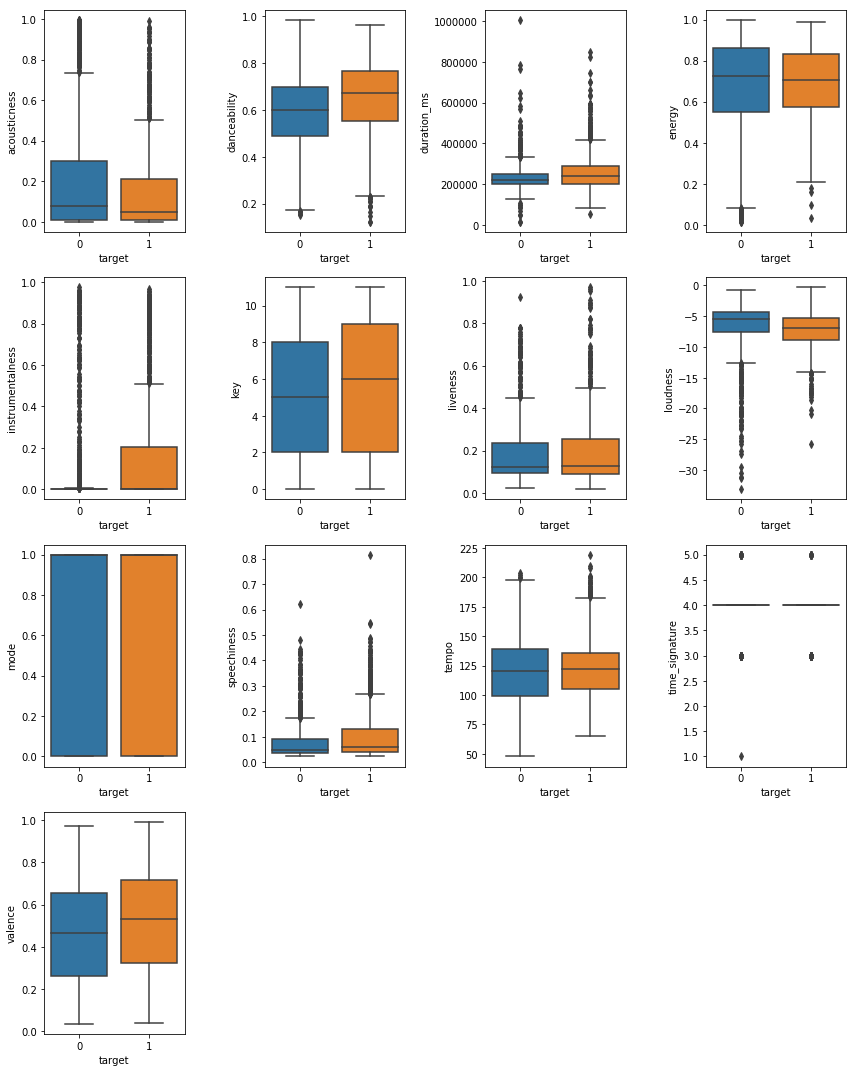

In [61]:
stats_df = pd.DataFrame(columns=['column', 'p_val'])
plt.figure(figsize=(12,15))

for i in enumerate(df2.columns):    
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(data = df, x= 'target', y = i[1])
    t_val, p_val = stats.ttest_ind(df[df['target'] == 0][i[1]],df[df['target'] == 1][i[1]])
    stats_df = stats_df.append({'column': i[1],'p_val' : p_val}, ignore_index= True)
plt.tight_layout()
plt.show();

In [66]:
stats_df

,column,p_val
0,acousticness,0.000
1,danceability,0.000
2,duration_ms,0.000
3,energy,0.075
4,instrumentalness,0.000
5,key,0.132
6,liveness,0.237
7,loudness,0.001
8,mode,0.001
9,speechiness,0.000


There are the statistically significant differences between the preference groups in all audio features except few.

 Let's look at correlation between the audio features themselves. Strong positive or negative correlations between variables can throw off our models so it's important to see what we're dealing with.

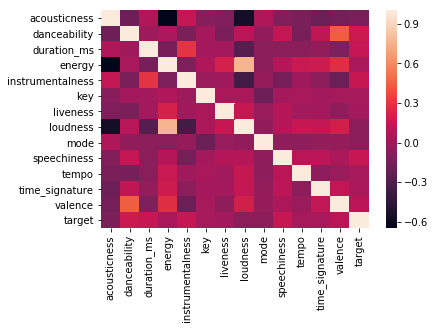

In [67]:
sns.heatmap(df.corr())
plt.show()

In general, there aren't too many strongly correlated variables. Energy and loudness are high positively correlated with each other, and both are somewhat negatively correlated with acousticness. Instrumentalness is also somewhat negatively correlated with loudness. We'll address the strong correlation between loudness and energy in the feature engineering section. For now, we'll leave the other variables as is.

# Feature Engineering
Now that we have a good feel for the data, the next step is feature selection and engineering. The data is already in pretty good shape, so only a small amount of feature engineering is needed. In this section, let's do the following:

Create dummy variables for key, Mode and time_signature

Create interaction variable for loudness + energy

Check correlations in feature dataset

Normalize the data

Specify data for input into models

In [73]:
print(df.key.value_counts())
print(df['mode'].value_counts())
print(df.time_signature.value_counts())


1     257
0     216
7     212
9     191
11    187
2     184
5     166
6     159
10    141
8     136
4     105
3      63
Name: key, dtype: int64
1    1235
0     782
Name: mode, dtype: int64
4.000    1891
3.000      93
5.000      32
1.000       1
Name: time_signature, dtype: int64


In [7]:
df2 = df.loc[:,~df.columns.isin(['song_title'  ,'artist','target','key','mode','time_signature' ])]


In [8]:
key_dum = pd.get_dummies(df.key)
mode_dum = pd.get_dummies(df['mode'])
time_dum = pd.get_dummies(df.time_signature)
features = pd.concat([df2,key_dum,mode_dum, time_dum],axis=1)

features.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,8,9,10,11,0,1,1.0,3.0,4.0,5.0
0,0.010,0.833,204600,0.434,0.022,0.165,-8.795,0.431,150.062,0.286,...,0,0,0,0,0,1,0,0,1,0
1,0.199,0.743,326933,0.359,0.006,0.137,-10.401,0.079,160.083,0.588,...,0,0,0,0,0,1,0,0,1,0
2,0.034,0.838,185707,0.412,0.000,0.159,-7.148,0.289,75.044,0.173,...,0,0,0,0,0,1,0,0,1,0
3,0.604,0.494,199413,0.338,0.510,0.092,-15.236,0.026,86.468,0.230,...,0,0,0,0,0,1,0,0,1,0
4,0.180,0.678,392893,0.561,0.512,0.439,-11.648,0.069,174.004,0.904,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# Create loudness/energy interaction
features['loud*energy'] = features['loudness'] * features['energy']

In [12]:
features.drop(['loudness', 'energy'], axis = 1, inplace=True)

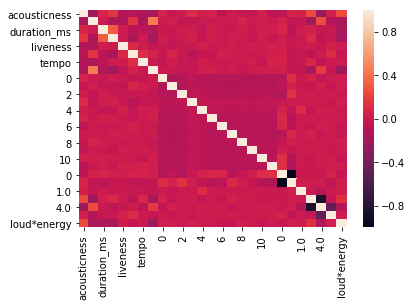

In [13]:
sns.heatmap(features.corr())
plt.show()

In [14]:

# Normalize
from sklearn.preprocessing import StandardScaler
normed_features = StandardScaler().fit_transform(features)
# Specify model inputs to feed into pipelines
X = normed_features
y = df['target']

# Verify shapes align
print(X.shape)
print(y.shape)

(2017, 27)
(2017,)


# Modelling
Our data is ready to go. Let's plug it into some models and see what predictive and explanatory power we can get. In this section, I'd like to compare the performance of several different types of algorithms.

Here's what we'll explore:

•	Naive Bayes

•	Logistic Regression

•	Random Forest

•	Gradient Boosted

•	k-Nearest Neighbor

# CROSS-VALIDATION

The first step is to split the data into a training and validation set. Models will be optimized using the training set and the validation set will be used to test the model. This will come be useful for determining if a model is overfit. For the training dataset, we'll randomly choose 70% of the data. The remaining 30% will be used for validation. We'll also use stratified sampling to maintain class balance when splitting the data.

In [15]:

# Import train/test/split
from sklearn.model_selection import train_test_split

# Split data, set test size to 30%, use stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y,
    test_size=0.3, 
    random_state=17
)

# Examine shape of data sets
print('Training size:', X_train.shape, y_train.shape)
print('Test size:', X_test.shape, y_test.shape)

# Verify class balance in train/test sets
print(y_train.value_counts())
print(y_test.value_counts())

Training size: (1411, 27) (1411,)
Test size: (606, 27) (606,)
1    714
0    697
Name: target, dtype: int64
1    306
0    300
Name: target, dtype: int64


In [16]:
# Import some other performance metrics we'll use later on
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [17]:
# ********************// Naive Bayes //***************************

# Import model
from sklearn.naive_bayes import BernoulliNB

# Create instance
bnb = BernoulliNB()

# Fit training data
bnb.fit(X_train, y_train)

# Predict with training set
y_pred_train = bnb.predict(X_train)

# Predict with test set
y_pred_test = bnb.predict(X_test)

# Get accuracy scores
print('NB training accuracy score:', round(accuracy_score(y_pred_train, y_train), 3))
print('NB test accuracy score:', round(accuracy_score(y_pred_test, y_test), 3))

NB training accuracy score: 0.663
NB test accuracy score: 0.67


The model performs decently. The training set accuracy is 66.3% and the test set accuracy is 67%. This indicates the model is slightly overfit, but overall it's not too bad.

let's take a brief look at false positives, false negatives, precision and recall of our model would look like.

In [19]:
# Confusion matrix training data
print('Confusion matrix training data: \n', confusion_matrix(y_train, y_pred_train), '\n')

# Classification metrics
print('Precision/Recall training data: \n', classification_report(y_train, y_pred_train))

Confusion matrix training data: 
 [[457 240]
 [236 478]] 

Precision/Recall training data: 
              precision    recall  f1-score   support

          0       0.66      0.66      0.66       697
          1       0.67      0.67      0.67       714

avg / total       0.66      0.66      0.66      1411



From left to right, top to bottom, the confusion matrix gives the breakdown of true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP).

The classification report gives us precision, recall, and f1-scores.

$Precision$ is a measurement of the true positives relative to the total number of predicted positive values .

$Recall$ (or sensitivity) is a measurement of the true positives relative to the total number of actual positive values.

The $F1 score$ combines precision and recall, providing the harmonic mean.


# LOGISTIC REGRESSION

The next algorithm we'll look at is logistic regression.

Logistic regression training accuracy score:  0.708
Logistic regression test accuracy score:  0.706


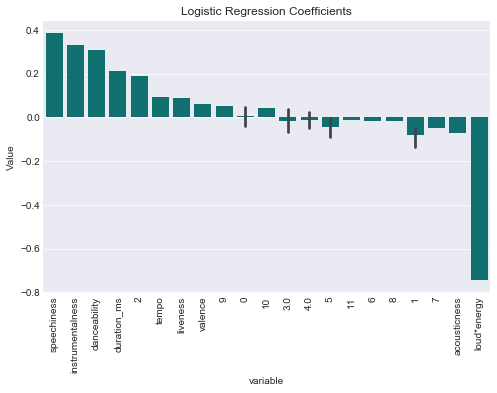

In [20]:
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance.  Set C very large so there's no regularization 
lr = LogisticRegression(C=1e10)

# Fit with training data
lr.fit(X_train, y_train)


# Get accuracy score and confusion matrix
print('Logistic regression training accuracy score: ', round(lr.score(X_train, y_train), 3))
print('Logistic regression test accuracy score: ', round(lr.score(X_test, y_test), 3))

# Get coefficients, flatten, and send to list
coef_list = lr.coef_.ravel().tolist()

# Create new data frame with coefficients
coef = pd.DataFrame(data=coef_list, columns=['coef'])

# Add in variable names
coef['variable'] = list(features)

# Sort by coefficient value
sorted_coef = coef.sort_values('coef', ascending=False)

# Plot 
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.barplot(x=sorted_coef['variable'], y=sorted_coef['coef'], color='teal')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Logistic Regression Coefficients')

plt.show()

# RANDOM FOREST

Let's try out Random Forest and Gradient Boosted Random Forest algorithms next. Random Forests work by generating several different trees from subsets of the data and then averaging the results. This can improve overall accuracy and combat overfitting seen in a single Decision Tree. Gradient Boosted Random Forests are optimized to reduce residuals of each successive tree in the forest. We'll again use a grid search to select the best hyperparameters for each model variation.

In [31]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, cross_val_score

In [28]:
# ************************ // Random Forest - Grid Search //*****************


# Create instance.  Set # features to sqrt of total.
forest = ensemble.RandomForestClassifier(random_state=17)
# Fit with training data
forest.fit(X_train, y_train)

# Get accuracy scores
print('RF training accuracy score:', round(accuracy_score(y_pred_train, y_train), 3))
print('RF test accuracy score:', round(accuracy_score(y_pred_test, y_test), 3))

RF training accuracy score: 0.663
RF test accuracy score: 0.67


With the default settings of the Random Forest model, the accuracy on the test set was 66% which is similar to what we got from Logistic Regression. Let's try to optimize this model.

In [29]:
rfc_params  = {
    'n_estimators':[100,200,500],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[4, 6,7, 8, None],
    'min_samples_split':[2, 8]
}
rfc_grid = GridSearchCV(ensemble.RandomForestClassifier(random_state=1), param_grid=rfc_params, cv=5)
rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

0.780297661233
{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 500}


let's use these parameters for a new Random Forest model and see the scores.

In [32]:
rfc = ensemble.RandomForestClassifier( **rfc_grid.best_params_, random_state = 1)
rfc.fit(X_train, y_train)
rfc_train_score = cross_val_score(rfc, X_train, y_train, cv = 5)
rfc_test_score = cross_val_score(rfc, X_test, y_test, cv = 5)
rfc_ROC_score = cross_val_score(rfc, X_test, y_test, cv = 5)
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(rfc_train_score.mean(), rfc_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(rfc_test_score.mean(), rfc_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(rfc_ROC_score.mean(), rfc_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.780 (+/-0.08)
Test Set- Cross Validation Score : 0.746 (+/-0.06)
ROC Score : 0.746 (+/-0.06)


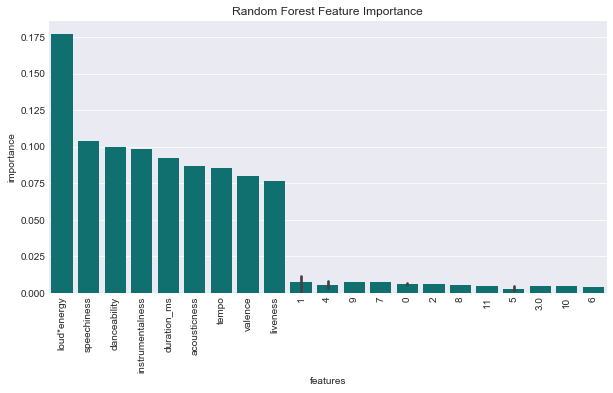

In [35]:
# Evaluate feature importance
forest_features = pd.DataFrame()
forest_features['importance'] = forest.feature_importances_
forest_features['features'] = features.columns
sorted_forest = forest_features.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(x=sorted_forest['features'] , y=sorted_forest['importance'], color='teal')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Gradient Boosted Regression Trees

In [34]:
gbrt = ensemble.GradientBoostingClassifier(random_state=1)
gbrt.fit(X_train, y_train)
gbrt_train_score = cross_val_score(gbrt, X_train, y_train, cv = 5)
gbrt_test_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
gbrt_ROC_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_train_score.mean(), gbrt_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_test_score.mean(), gbrt_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbrt_ROC_score.mean(), gbrt_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.758 (+/-0.06)
Test Set- Cross Validation Score : 0.728 (+/-0.05)
ROC Score : 0.728 (+/-0.05)


In [36]:
# Set of parameters to test for best score in Grid Search CV
parameters = {'loss':['deviance'],
               'min_samples_split':[50,100,200],
             'min_samples_leaf':[25,50,75],
             'max_depth':[5,6,7,8],
             'max_features':['sqrt'],
             'subsample':[0.6,0.8],
             'n_estimators':[50,100,150]}

#fitting model and printing best parameters and score from model
grid_gbc = GridSearchCV(gbrt, param_grid=parameters, scoring='roc_auc')
grid_gbc.fit(X_train, y_train)

print('Best Score:', grid_gbc.best_score_)
best_params_gbc = grid_gbc.best_params_
print('Best Parameters:', best_params_gbc)

Best Score: 0.854991675314
Best Parameters: {'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 25, 'min_samples_split': 50, 'n_estimators': 100, 'subsample': 0.8}


In [38]:
gbc2 = ensemble.GradientBoostingClassifier(**best_params_gbc)
gbc2.fit(X_train, y_train)
gbc2_train_score = cross_val_score(gbc2, X_train, y_train, cv = 5)
gbc2_test_score = cross_val_score(gbc2, X_test, y_test, cv = 5)
gbc2_ROC_score = cross_val_score(gbc2, X_test, y_test, cv = 5)
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbc2_train_score.mean(), gbc2_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbc2_test_score.mean(), gbc2_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbc2_ROC_score.mean(), gbc2_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.766 (+/-0.04)
Test Set- Cross Validation Score : 0.744 (+/-0.09)
ROC Score : 0.721 (+/-0.08)


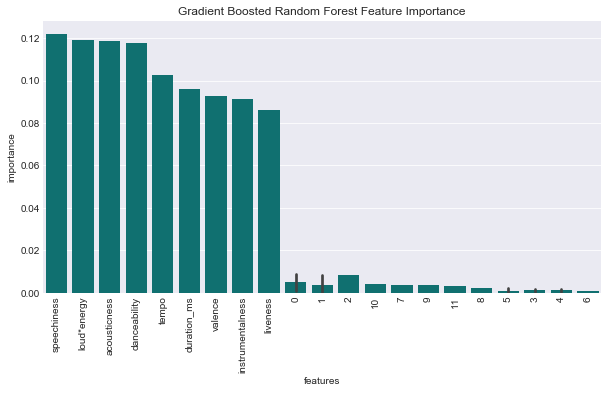

In [39]:
# Evaluate feature importance
gbc_features = pd.DataFrame()
gbc_features['importance'] = gbc2.feature_importances_
gbc_features['features'] = features.columns
gbc_sorted = gbc_features.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(x=gbc_sorted['features'] , y=gbc_sorted['importance'], color='teal')
plt.title('Gradient Boosted Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Conclusions
For this project, we've built a classifier to predict whether or not I will like a song based on Spotify's audio features. 

Overall, model accuracy ranged from ~65 - 75%. Both the models - random forest and gradient boosting performed similarly. Given I have a varied taste in music, it's not suprising model performance was what it was. I like many different types of music based on my mood and my playlist of 'liked' data is quite diverse. Plus, looking at the boxplots of audio features reveals quite a bit of overlap in many of the features regardless of preference class. This indicates there may be more to my music preferences than audio features alone.

And perhaps more interesting than predicting song preference, I got to peek under the hood and better understand the mechanics of my musicial tastes. speechiness, loud, energy,acoustic tendencies, danceability  were the top 6 features affecting the likability of the song.

I learned that I tend to like songs with a high speechiness, lower energy, and lower loudness.

Thanks for reading!